In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("MFG10YearTerminationData.csv")

print(df.head())

   EmployeeID   recorddate_key birthdate_key orighiredate_key  \
0        1318  12/31/2006 0:00      1/3/1954        8/28/1989   
1        1318  12/31/2007 0:00      1/3/1954        8/28/1989   
2        1318  12/31/2008 0:00      1/3/1954        8/28/1989   
3        1318  12/31/2009 0:00      1/3/1954        8/28/1989   
4        1318  12/31/2010 0:00      1/3/1954        8/28/1989   

  terminationdate_key  age  length_of_service  city_name department_name  \
0            1/1/1900   52                 17  Vancouver       Executive   
1            1/1/1900   53                 18  Vancouver       Executive   
2            1/1/1900   54                 19  Vancouver       Executive   
3            1/1/1900   55                 20  Vancouver       Executive   
4            1/1/1900   56                 21  Vancouver       Executive   

  job_title  store_name gender_short gender_full termreason_desc  \
0       CEO          35            M        Male  Not Applicable   
1       CEO     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [4]:
print(df.columns)

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')


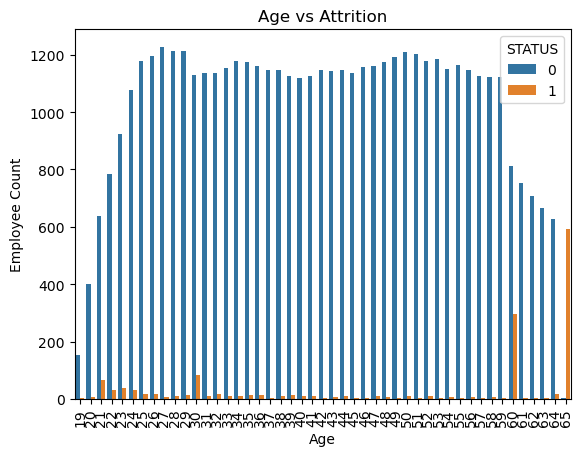

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='age', hue='STATUS', data=df)

plt.title("Age vs Attrition")
plt.xlabel("Age")
plt.ylabel("Employee Count")
plt.xticks(rotation=90)
plt.show()

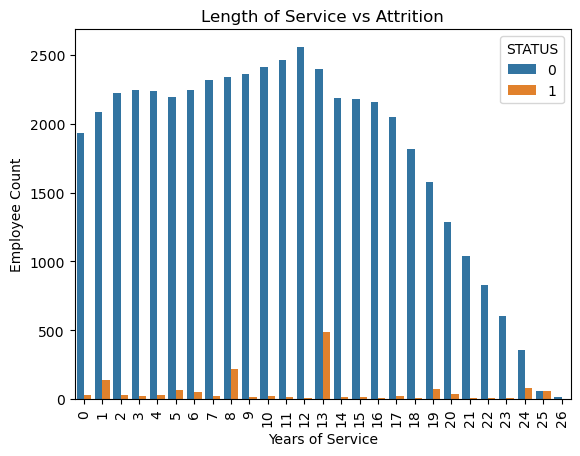

In [33]:
sns.countplot(x='length_of_service', hue='STATUS', data=df)

plt.title("Length of Service vs Attrition")
plt.xlabel("Years of Service")
plt.ylabel("Employee Count")
plt.xticks(rotation=90)
plt.show()

In [6]:
#Drop useless columns
df.drop(columns=["employee_id", "record_date",
                 "birth_date", "hire_date",
                 "termination_date"], inplace=True, errors="ignore")

In [7]:
#Encode categorical columns
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col].astype(str))

In [8]:
#Separate features and target
X = df.drop("STATUS", axis=1)
y = df["STATUS"]

In [9]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
#Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
df['Tenure_group'] = pd.cut(
    df['length_of_service'],
    bins=[0, 2, 5, 10, 40],
    labels=['New', 'Mid', 'Senior', 'Veteran']
)

df['Age_group'] = pd.cut(
    df['age'],
    bins=[18, 30, 40, 60],
    labels=['Young', 'Adult', 'Senior']
)

In [12]:
#Train model [Train Multiple Models]
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name, model.score(X_test, y_test))

Logistic 0.9907360789447186
DecisionTree 1.0
RandomForest 1.0


In [13]:
y_pred = model.predict(X_test)

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [15]:
#Advanced Evaluation Metrics
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9638
           1       1.00      1.00      1.00       293

    accuracy                           1.00      9931
   macro avg       1.00      1.00      1.00      9931
weighted avg       1.00      1.00      1.00      9931

ROC: 1.0


In [16]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[9638    0]
 [   0  293]]


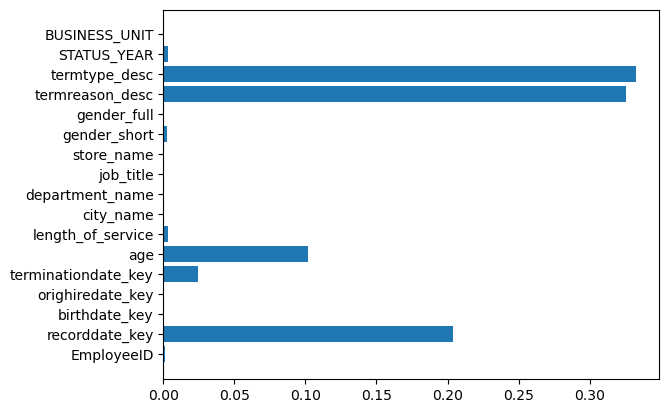

In [17]:
# RANDOM FOREST = for model strong prediction kare aur samjhe kaun-kaun se features important hain
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
import matplotlib.pyplot as plt

plt.barh(X.columns, importances)
plt.show()

In [18]:
risk_prob = rf.predict_proba(X_test)[:,1]

In [19]:
print(risk_prob)

[0. 0. 0. ... 1. 0. 0.]


In [20]:
import joblib

joblib.dump(model, "attrition_model.pkl")

['attrition_model.pkl']

In [21]:
print(X.columns)


Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'BUSINESS_UNIT'],
      dtype='object')
